<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Computer Vision Project Module
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


In [72]:
# Import Basic Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
print(tf.__version__) 
import cv2
from glob import glob
import warnings
warnings.filterwarnings("ignore")


2.12.0


# Part B

• DOMAIN: Botanical Research
    
• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of flowers. They already have 
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s 
species from a photo.

• DATA DESCRIPTION: The dataset comprises of images from 17 plant species.
    
• PROJECT OBJECTIVE: To experiment with various approaches to train an image classifier to predict type of flower from the image.

## Import and read oxflower17 dataset from tflearn and split into X and Y while loading.
## Print Number of images and shape of the images. 


In [52]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Import the necessary libraries
import tflearn.datasets.oxflower17 as oxflower17

# Load the dataset
x, y = oxflower17.load_data(one_hot=True)

# Print the shape of the dataset
print("X shape:", x.shape)
print("Y shape:", y.shape)


X shape: (1360, 224, 224, 3)
Y shape: (1360,)


## Print count of each class from y

In [53]:
unique_labels = np.unique(y)
num_labels = len(unique_labels)
print("\nNumber of unique labels:", num_labels)
print("Sample of label array:", y[:10])


Number of unique labels: 17
Sample of label array: [ 0  5 15 11  2 12  2 11 12 14]


In [54]:
import collections
# Compute the class distribution
label_counts = collections.Counter(y)
total_images = len(y)

# Print the number of images in each class and the class distribution
print("Class distribution:")
for label, count in label_counts.items():
    percentage = 100.0 * count / total_images
    print("Class {}: {} images ({:.2f}%)".format(label, count, percentage))

Class distribution:
Class 0: 80 images (5.88%)
Class 5: 80 images (5.88%)
Class 15: 80 images (5.88%)
Class 11: 80 images (5.88%)
Class 2: 80 images (5.88%)
Class 12: 80 images (5.88%)
Class 14: 80 images (5.88%)
Class 13: 80 images (5.88%)
Class 1: 80 images (5.88%)
Class 4: 80 images (5.88%)
Class 9: 80 images (5.88%)
Class 10: 80 images (5.88%)
Class 6: 80 images (5.88%)
Class 8: 80 images (5.88%)
Class 3: 80 images (5.88%)
Class 16: 80 images (5.88%)
Class 7: 80 images (5.88%)


## Display 5 random images. 

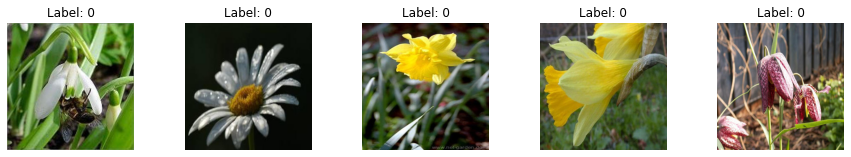

In [56]:
# Load the dataset
x, y = oxflower17.load_data(one_hot=True)

# Generate 5 random indices
random_indices = np.random.randint(0, len(x), size=5)

# Plot the images
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, index in enumerate(random_indices):
    axs[i].imshow(x[index])
    axs[i].set_title("Label: {}".format(np.argmax(y[index])))
    axs[i].axis('off')
plt.show()


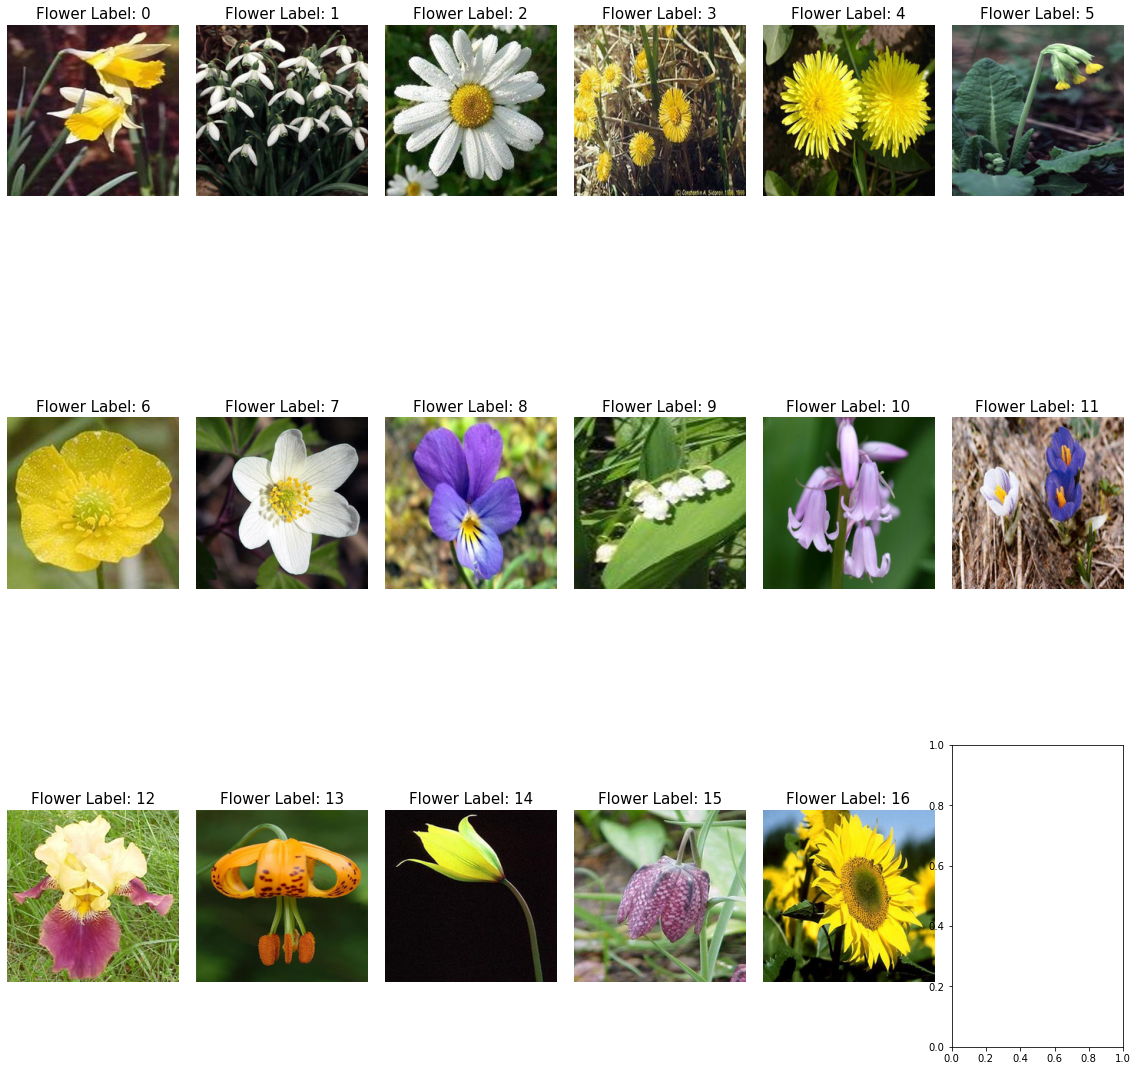

In [57]:
# Viewing a flower image from every species
# Load the dataset
x, y = oxflower17.load_data(one_hot=True)

# Set the number of columns for the subplot grid
cols = 6

# Calculate the number of rows for the subplot grid
rows = int(np.ceil(len(np.unique(y))/cols))

# Create the subplot grid
fig, ax = plt.subplots(rows, cols, figsize=(20,20))

# Loop through each unique label in the dataset
for i, label in enumerate(np.unique(y)):
    # Calculate the row and column index for the current label
    col = i % cols
    row = int(i / cols)

    # Find the index of the first image with the current label
    index = np.argmax(y == label)

    # Plot the image
    ax[row][col].imshow(x[index])
    ax[row][col].set_title(f"Flower Label: {label}", fontsize=15)
    ax[row][col].axis('off')

# Adjust the spacing and display the plot
fig.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()


## Transform the image into grayscale format and display the same

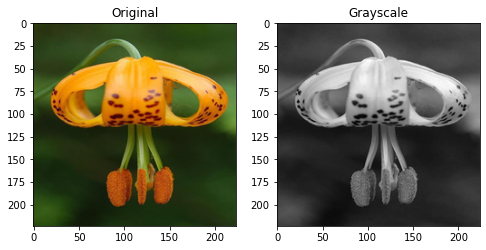

In [58]:
from skimage.color import rgb2gray
# Select an image
img = x[10]

# Convert to grayscale
gray_img = rgb2gray(img)

# Display the original and grayscale images side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Grayscale')
plt.show()


## Apply a filter to sharpen the image and display the image before and after sharpening.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


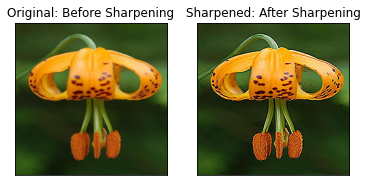

In [59]:
# Select an image to sharpen
img_index = 10
img = x[img_index]

# Define the sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Apply the sharpening filter
sharp = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

# Display the original and sharpened images side by side
plt.subplot(121),plt.imshow(img),plt.title('Original: Before Sharpening')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharp),plt.title('Sharpened: After Sharpening')
plt.xticks([]), plt.yticks([])
plt.show()


## Apply a filter to blur the image and display the image before and after blur.

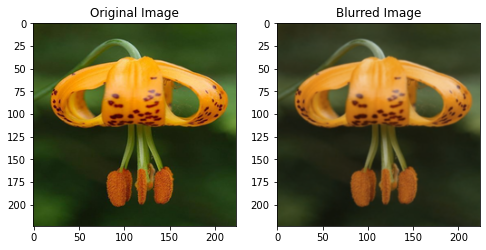

In [60]:
from scipy import ndimage

# Select an image to blur
img_index = 10
img = x[img_index]

# Apply a Gaussian blur filter
sigma = 0.6
blurred_img = ndimage.gaussian_filter(img, sigma)

# Display the original and blurred images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[1].imshow(blurred_img)
ax[1].set_title("Blurred Image")
plt.show()


## Display all the 4 images from above questions besides each other to observe the difference.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


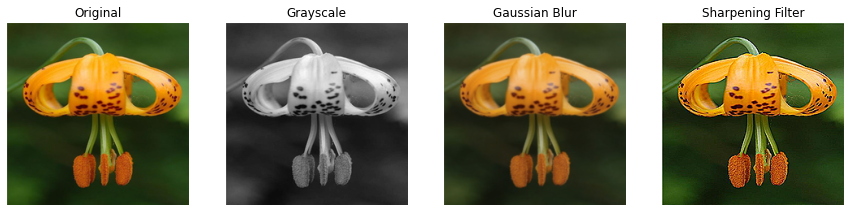

In [61]:
from skimage.color import rgb2gray

# Select an image
img_index = 10
img = x[img_index]

# Convert to grayscale
gray_img = rgb2gray(img)

# Apply Gaussian blur
sigma = 0.6
blurred_img = ndimage.gaussian_filter(img, sigma)

# Apply sharpening filter
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharp_img = cv2.filter2D(img, -1, kernel)

# Display all four images side by side
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(gray_img, cmap='gray')
axs[1].set_title("Grayscale")
axs[2].imshow(blurred_img)
axs[2].set_title("Gaussian Blur")
axs[3].imshow(sharp_img)
axs[3].set_title("Sharpening Filter")

# Remove the axes and display the plot
for ax in axs:
    ax.axis('off')
plt.show()


## Split the data into train and test with 80:20 proportion.

In [62]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Print the shapes of the train and test sets
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (1088, 224, 224, 3), (1088,)
Test set: (272, 224, 224, 3), (272,)


## Train a model using any Supervised Learning algorithm and share performance metrics on test data

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Perform Normalization
x_train = X_train/255.0
x_test = X_test/255.0

# Reshaping to 2D Array for Supervised Learning
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train2, y_train)

# Reshape Test Data
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# Predict on Test Data
y_pred = rf.predict(x_test2)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy:  0.5036764705882353
Confusion Matrix:
 [[ 7  0  0  1  1  0  1  0  0  1  0  0  0  0  1  1  0]
 [ 0  3  0  0  0  1  0  0  1  2  1  1  1  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  3  4  1  2  1  0  1  0  1  0  0  1  0  2]
 [ 3  0  0  0 10  1  1  0  0  0  0  0  0  0  1  0  1]
 [ 1  1  0  1  0  5  0  1  0  6  0  0  0  0  3  1  0]
 [ 2  0  0  0  1  1  7  0  0  2  0  0  0  0  1  0  0]
 [ 0  0  2  0  0  0  0 12  0  1  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  4 11  0  1  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  8  1  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  2 10  1  0  0  1  0  1]
 [ 0  1  1  0  0  1  0  2  2  1  4  4  3  0  0  3  0]
 [ 0  1  0  0  2  0  0  2  1  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  1  0  0  1  7  1  2  2]
 [ 4  0  0  0  2  0  0  0  0  1  1  1  0  3  1  1  2]
 [ 0  1  0  0  0  2  0  0  0  2  1  1  0  0  0 10  0]
 [ 1  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0 11]]
Classification Report:
         

## Train a model using Neural Network and share performance metrics on test data.

In [64]:
# Convert target variable
# Import Library
from sklearn.preprocessing import LabelBinarizer

# Create class for encoding
enc = LabelBinarizer()

# Fit & Transform the training target variable
y_train2 = enc.fit_transform(y_train)

# Display the newly encoded target class of training variable
y_train2[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [94]:
# Fit & Transform the test target variable
y_test2 = enc.transform(y_test)

# Display the newly encoded target class of training variable
y_test2[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [97]:
# Import Relevant Libraries
import itertools
import tensorflow
from tensorflow.keras.layers import  Dense, Dropout, InputLayer, BatchNormalization, Flatten
from tensorflow.keras.layers import  GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Create NN Model


model_NN = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))
model_NN.add(BatchNormalization())
model_NN.add(Flatten())
#Dense layer

#adding 1 st dense layer
model_NN.add(Dense(512, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))

model_NN.add(Dense(256, activation='relu'))
model_NN.add(Dense(128, activation='relu'))

#adding 2 nd dense layer
model_NN.add(Dense(128, activation='relu'))
model_NN.add(BatchNormalization())
model_NN.add(Dropout(0.5))

#adding dense layer with same output as no of cateogries, in our case 17 category with softmax function
model_NN.add(Dense(17, activation='softmax'))

# Compile model
adam = optimizers.Adam(lr=1e-3)
model_NN.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [101]:
# Fit the model
history = model_NN.fit(X_train, y_train2, validation_data=(X_test, y_test2), epochs=15, batch_size=32, verbose=1)

Train on 1088 samples, validate on 272 samples
Epoch 1/15
1088/1088 [==============================] - 27s 25ms/sample - loss: 0.8011 - acc: 0.7482 - val_loss: 1.4538 - val_acc: 0.5404
Epoch 2/15
1088/1088 [==============================] - 27s 25ms/sample - loss: 0.7347 - acc: 0.7601 - val_loss: 1.4654 - val_acc: 0.5441
Epoch 3/15
1088/1088 [==============================] - 28s 26ms/sample - loss: 0.6545 - acc: 0.7868 - val_loss: 1.5535 - val_acc: 0.5037
Epoch 4/15
1088/1088 [==============================] - 28s 25ms/sample - loss: 0.5857 - acc: 0.8189 - val_loss: 1.4896 - val_acc: 0.5404
Epoch 5/15
1088/1088 [==============================] - 27s 25ms/sample - loss: 0.5643 - acc: 0.8244 - val_loss: 1.5330 - val_acc: 0.5404
Epoch 6/15
1088/1088 [==============================] - 28s 25ms/sample - loss: 0.5633 - acc: 0.8162 - val_loss: 1.6483 - val_acc: 0.5147
Epoch 7/15
1088/1088 [==============================] - 28s 26ms/sample - loss: 0.5299 - acc: 0.8300 - val_loss: 1.5635 - val

In [102]:
test_loss, test_acc = model_NN.evaluate(X_test, y_test2)

# Print results
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Test loss: 1.614234910291784
Test accuracy: 0.5367647


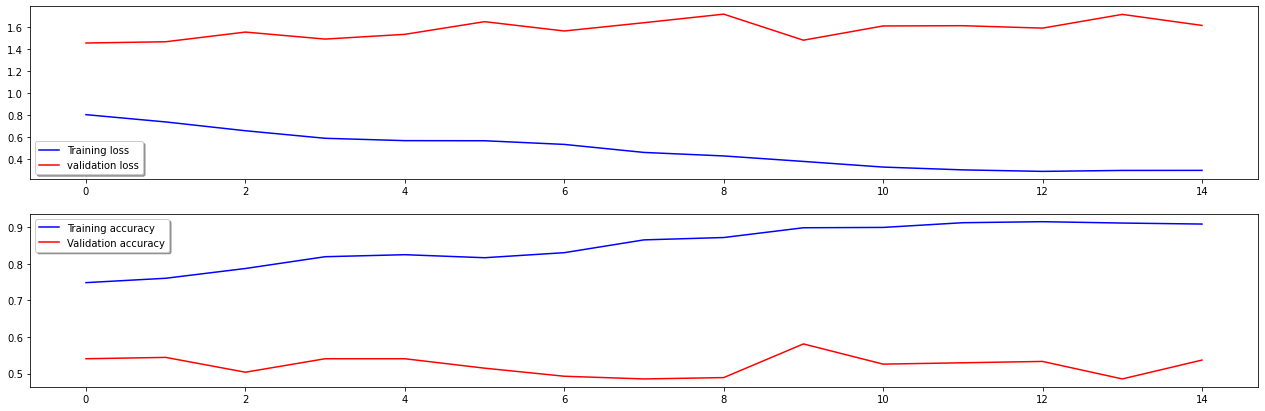

In [103]:
# Model Evaluation Plots
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [117]:
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

model_CNN = Sequential()

model_CNN.add(BatchNormalization(input_shape = (224, 224, 3)))

model_CNN.add(Convolution2D(filters = 64, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3))) 
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_CNN.add(MaxPooling2D(pool_size = 2))

model_CNN.add(Flatten()) 

# fully connected layer
model_CNN.add(Dense(units = 512,activation = 'relu'))
model_CNN.add(Dense(units = 256, activation = 'relu'))
model_CNN.add(Dense(units = 128, activation = 'relu'))

model_CNN.add(Dense(units = 17, activation = 'softmax')) 

model_CNN.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_CNN.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_60 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_63 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 111, 111, 64)      36928     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                     

In [118]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
    )

In [119]:
data_generator.fit(X_train) 


In [120]:
cnn_history = model_CNN.fit_generator(data_generator.flow(X_train,y_train2,batch_size=32),epochs=20,
          validation_data=(X_test,y_test2))

Epoch 1/20
34/34 [==============================] - 133s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 2.6580 - acc: 0.1121 - val_loss: 2.4597 - val_acc: 0.1618
Epoch 2/20
34/34 [==============================] - 133s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 2.2783 - acc: 0.1949 - val_loss: 2.2403 - val_acc: 0.2500
Epoch 3/20
34/34 [==============================] - 132s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 2.0273 - acc: 0.2665 - val_loss: 2.0938 - val_acc: 0.2721
Epoch 4/20
34/34 [==============================] - 132s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 1.9194 - acc: 0.3061 - val_loss: 1.8400 - val_acc: 0.3640
Epoch 5/20
34/34 [==============================] - 132s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 1.7181 - acc: 0.3897 - val_loss: 1.7965 - val_acc: 0.3860
Epoch 6/20
34/34 [==============================] - 134s 4s/step - batch: 16.5000 - size: 32.0000 - loss: 1.6812 - acc: 0.3888 - val_loss: 1.6601 - val_acc: 0.4081
Epoch 7/20
34/34

In [121]:
cnn_loss, cnn_accuracy = model_CNN.evaluate(X_test, y_test2, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

Test loss: 1.069987465353573
Test accuracy: 0.6286765


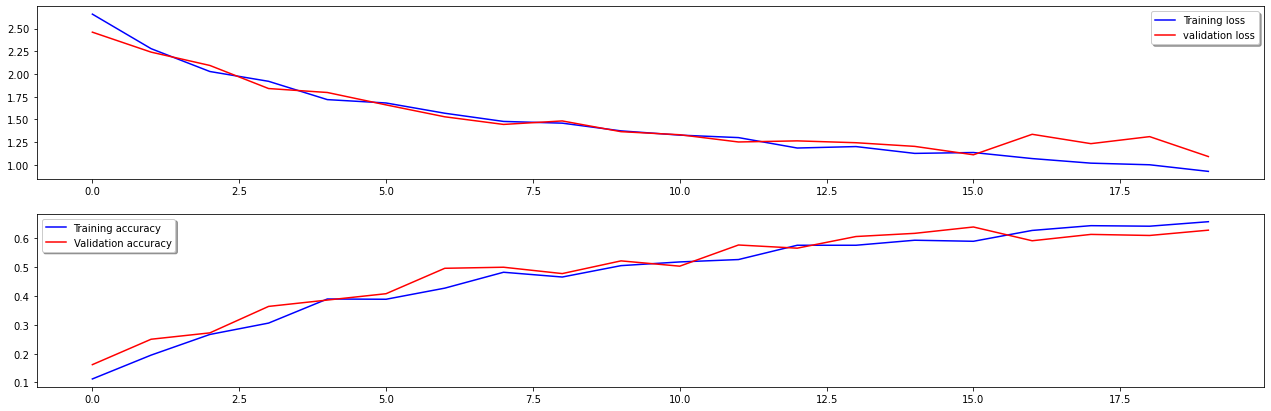

In [122]:
# Model Evaluation Plots
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(cnn_history.history['loss'], color='b', label="Training loss")
ax[0].plot(cnn_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(cnn_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(cnn_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [123]:
# Make predictions
cnn_pred = model_CNN.predict(X_test)

# Convert predictions classes to one hot vectors 
cnn_pred_classes = np.argmax(cnn_pred,axis = 1) 

# Convert test observations to one hot vectors
Y_test = np.argmax(y_test2,axis = 1) 

# Classification report
print(classification_report(cnn_pred_classes,Y_test))

              precision    recall  f1-score   support

           0       0.38      0.31      0.34        16
           1       0.90      0.39      0.55        23
           2       0.95      0.54      0.69        37
           3       0.56      0.82      0.67        11
           4       0.82      0.56      0.67        25
           5       0.68      0.62      0.65        21
           6       0.36      0.56      0.43         9
           7       0.56      0.50      0.53        18
           8       0.53      0.82      0.64        11
           9       0.77      0.67      0.71        15
          10       0.19      0.75      0.30         4
          11       0.41      0.82      0.55        11
          12       0.47      0.58      0.52        12
          13       1.00      0.79      0.88        19
          14       0.31      0.71      0.43         7
          15       0.82      0.82      0.82        17
          16       1.00      0.94      0.97        16

    accuracy              

In [134]:
# Save the model to a file
model.save('model_CNN.h5')

## Predict the class/label of image ‘Prediction-1.jpg’ using best performing model and share predicted label

In [138]:
# Load the Image that has to be predicted
imgage_pred = cv2.imread('Prediction-1.jpg')
imgage_pred_resize = cv2.resize(imgage_pred,(224,224),interpolation = cv2.INTER_CUBIC)
#cv2_imshow(imgage_pred_resize)
img_predict = np.expand_dims(imgage_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{imgage_pred.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

The shape of image to be predicted is:'(224, 224, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [140]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('model_CNN.h5')

# Load the image to be predicted
img = cv2.imread('Prediction-1.jpg')

# Resize and preprocess the image
img = cv2.resize(img, (224, 224))
img = np.array(img, dtype='float32') / 255.0
img = np.expand_dims(img, axis=0)

# Make prediction with the pre-trained model
prediction = model.predict(img)
pred_class = np.argmax(prediction, axis=1)[0]

# Get the name of the predicted image
filename = os.path.basename('Prediction-1.jpg')
name = os.path.splitext(filename)[0]

# Print the predicted label and name
print(f"Predicted label: {pred_class}")
print(f"Predicted image name: {name}")


# Display the prediction
print(f"The predicted flower is '{name}' with label: {pred_class}")

Predicted label: 1
Predicted image name: Prediction-1
The predicted flower is 'Prediction-1' with label: 1
